# Punto 1

## 3.1 Ejemplo: red binaria no dirigida

In [1]:
# llamamos las librerias 
import networkx as nx
# definimos el grafo a trabajar 
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6), (4,7), (5,6), (6,7)])

In [2]:
# imprimimos el tipo de dato y la direccion de memoria
print(type(G),'\n',id(G))

<class 'networkx.classes.graph.Graph'> 
 2854912292880


In [3]:
# mostrar nodos y la cantidad
print(G.nodes(),'\n',G.number_of_nodes())

[1, 2, 3, 4, 5, 6, 7] 
 7


In [4]:
# aristas y la cantidad
print(G.edges(),'\n',G.number_of_edges())

[(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6), (4, 7), (5, 6), (6, 7)] 
 10


In [5]:
import sys
sys.path.append('../src')
from utilidades import tallo_y_hoja
tallo_y_hoja(G)

1 -- [2, 3]
2 -- [1, 3, 4]
3 -- [1, 2, 5]
4 -- [2, 5, 6, 7]
5 -- [3, 4, 6]
6 -- [4, 5, 7]
7 -- [4, 6]


In [6]:
# es ponderada? 
print(nx.is_weighted(G))

False


In [7]:
# es simple?
print(G.is_multigraph()==False)

True


Text(0.5, 1.0, 'Red binaria no dirigida')

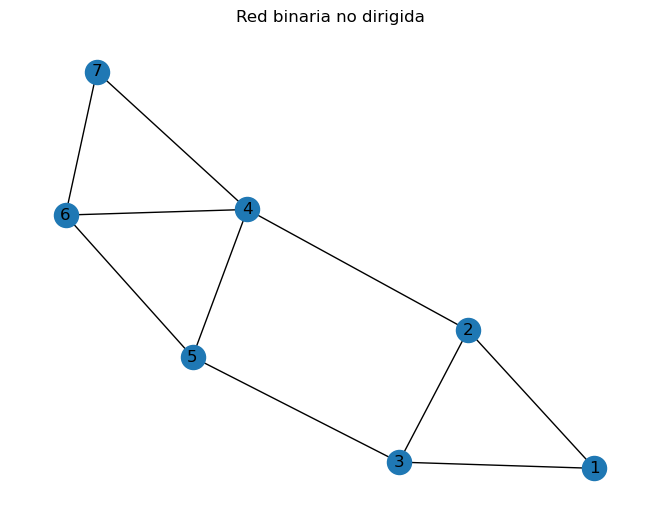

In [8]:
#visualizar el grafo con titulo
import random 
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.title("Red binaria no dirigida")

## 3.2 Ejmplo: red ponderada no dirigida

In [9]:
# red ponderada no dirigida
WG = G.copy()
random.seed(0)
WG.add_weighted_edges_from([(u, v, round(random.uniform(0, 1), 3)) for u, v in WG.edges()]) 
# pesos 
nx.get_edge_attributes(WG, 'weight')

{(1, 2): 0.844,
 (1, 3): 0.758,
 (2, 3): 0.421,
 (2, 4): 0.259,
 (3, 5): 0.511,
 (4, 5): 0.405,
 (4, 6): 0.784,
 (4, 7): 0.303,
 (5, 6): 0.477,
 (6, 7): 0.583}

In [10]:
# ponderada?
print(nx.is_weighted(WG))

True


Text(0.5, 1.0, 'Red Ponderada no dirigida')

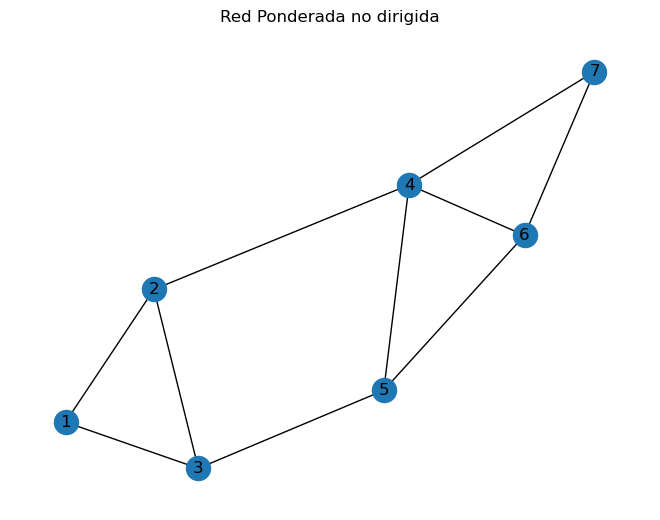

In [11]:
nx.draw(WG, with_labels=True)
plt.title("Red Ponderada no dirigida")

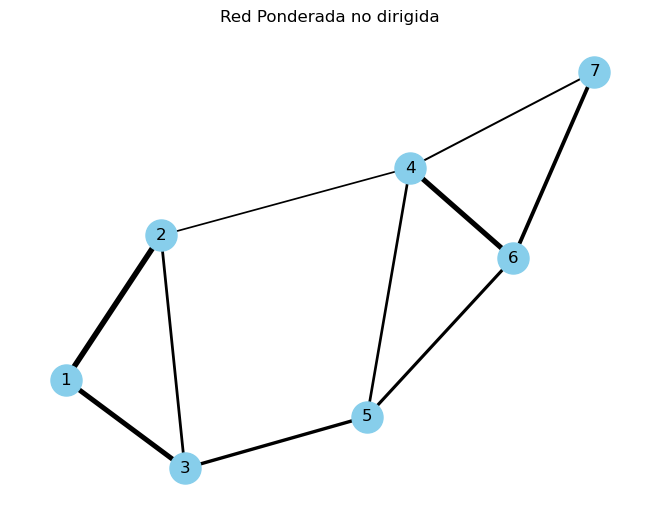

In [12]:
from utilidades import grafico_ponderado

grafico_ponderado(WG,n=4,label='Red Ponderada no dirigida')

## 3.3 Ejemplo: red binaria dirigida

In [13]:
# red binaria dirigida
DG = nx.DiGraph()
DG.add_edges_from([(1,2), (1,3), (2,3)])

In [14]:
# aristas 
print(DG.edges())

[(1, 2), (1, 3), (2, 3)]


In [15]:
# etiquetas
name = ['Juan','Maria','Pedro']
nx.set_node_attributes(DG, dict(enumerate(name, start=1)), 'name')

sexo = ['M','F','M']
nx.set_node_attributes(DG, dict(enumerate(sexo, start=1)), 'sexo')

print([(DG.nodes[u]['name'], DG.nodes[v]['name']) for u, v in DG.edges()])

[('Juan', 'Maria'), ('Juan', 'Pedro'), ('Maria', 'Pedro')]


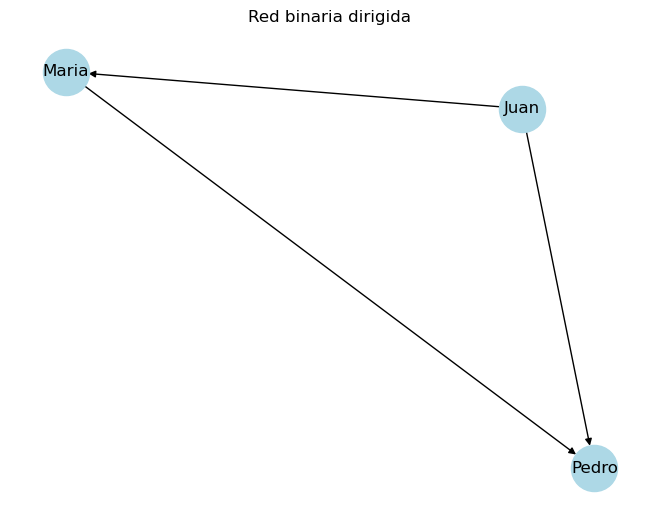

In [16]:
labels = nx.get_node_attributes(DG, 'name')
nx.draw(DG, labels=labels, with_labels=True, node_size=1100, node_color='lightblue')
plt.title("Red binaria dirigida")
plt.show()

## 4.2 Ejemplo: red binaria no dirigida

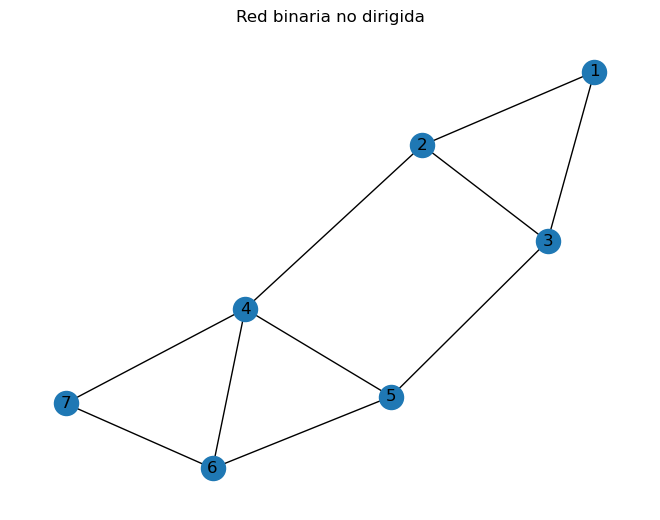

In [17]:
# definimos el grafo    
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6), (4,7), (5,6), (6,7)])
nx.draw(G, with_labels=True)
plt.title("Red binaria no dirigida")
plt.show()

In [18]:
# matriz de adyacencia
A = nx.adjacency_matrix(G)
# tipo de objeto
type(A)

scipy.sparse._csr.csr_array

In [19]:
# imprimir la matriz
print(A)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 4)	1
  (3, 1)	1
  (3, 4)	1
  (3, 5)	1
  (3, 6)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1
  (5, 3)	1
  (5, 4)	1
  (5, 6)	1
  (6, 3)	1
  (6, 5)	1


In [20]:
# formato de matriz
Y = A.todense()
print(Y)
type(Y)

[[0 1 1 0 0 0 0]
 [1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [0 1 0 0 1 1 1]
 [0 0 1 1 0 1 0]
 [0 0 0 1 1 0 1]
 [0 0 0 1 0 1 0]]


numpy.ndarray

In [21]:
# es simertrica?
import numpy as np
np.array_equal(Y, Y.T)

True

In [22]:
# 
yvec1 = [Y[i, j] for i in range(Y.shape[0]) for j in range(Y.shape[1]) if i > j]
yvec1

[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]

In [23]:
yvec2 = np.where(np.array(yvec1) == 1)[0]
yvec2

array([ 0,  1,  2,  4,  8,  9, 13, 14, 18, 20], dtype=int64)

# 4.4 Ejemplo: red binaria no dirigida (cont.)

In [24]:
# se encuentran los indices de los elementos iguales a 1
indices = np.argwhere(np.tril(Y) == 1)
# ajustamos los indices sumando 1 para que coincidan con los nodos
edges = [(i+1, j+1) for i, j in indices]
# convertimos a matriz
edges = np.array(edges)
# clase de objeto
print(type(edges))
# mostramos la matriz
print(edges)

<class 'numpy.ndarray'>
[[2 1]
 [3 1]
 [3 2]
 [4 2]
 [5 3]
 [5 4]
 [6 4]
 [6 5]
 [7 4]
 [7 6]]


# Punto 2 

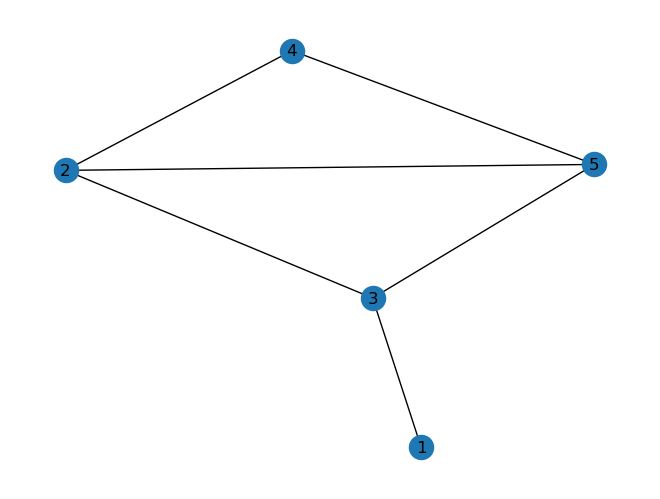

In [25]:
# visualizamos el grafo
G = nx.Graph()
G.add_edges_from([(1, 3), (2, 3), (2, 4), (2, 5), (3, 1), (3, 5), (4, 5), (5, 4)])
nx.draw(G, with_labels=True)

In [26]:
# b) calcular el orden, tamaño y el diámetro  del grafo
# orden
print(G.order()) 
# tamaño
print(G.size())
# diámetro
print(nx.diameter(G))

5
6
3


In [27]:
# c) calcular el grado de los nodos
print(G.degree())

[(1, 1), (3, 3), (2, 3), (4, 2), (5, 3)]


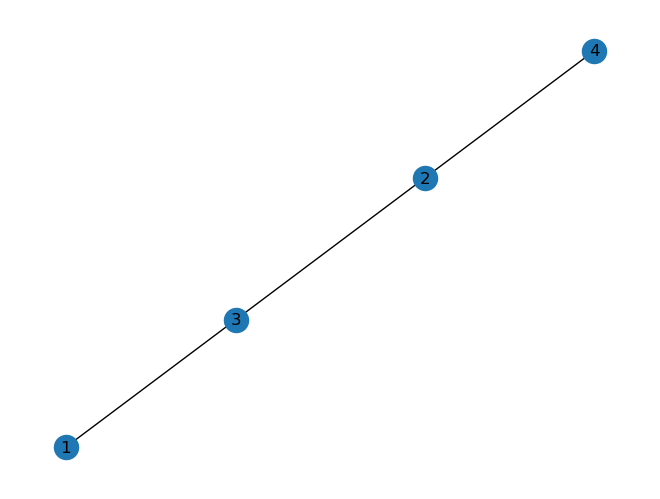

In [28]:
# d)  Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.
H = G.subgraph([1, 2, 3, 4])
nx.draw(H, with_labels=True)

# punto 3

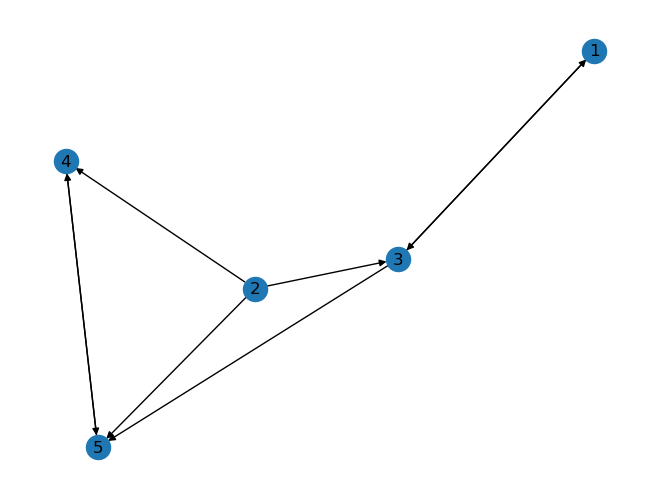

In [29]:
# a) Visualizar G.
# definimos el grafo
DG = nx.DiGraph()
# agregamos las aristas
DG.add_edges_from([(1, 3), (2, 3), (2, 4), (2, 5), (3, 1), (3, 5), (4, 5), (5, 4)])
# visualizamos el grafo
nx.draw(DG, with_labels=True)

In [30]:
# b) calcular el orden, tamaño y el diámetro  del grafo
# orden
print(DG.order()) 
# tamaño
print(DG.size())
# diámetro
# para esto tenemos que verificar si el grafo es fuerte o debilmente conectado
if nx.is_strongly_connected(DG):
    print(nx.diameter(DG))
else:
    print('El grafo no es fuerte conectado')
    # verificamos que componentes estan fuertemente conectados 
    componentes = list(nx.strongly_connected_components(DG))
    # guardamos el componente mas grande
    diametros = []
    for componente in componentes:
        componente_subgrafo = DG.subgraph(componente)
        diametros.append(nx.diameter(componente_subgrafo))
    diametro = max(diametros)    
    print(diametro)

5
8
El grafo no es fuerte conectado
1


In [31]:
#c) calcular el grado de los nodos
# grado de entrada
print(DG.in_degree())
# grado de salida
print(DG.out_degree())
# grado total
print(DG.degree())

[(1, 1), (3, 2), (2, 0), (4, 2), (5, 3)]
[(1, 1), (3, 2), (2, 3), (4, 1), (5, 1)]
[(1, 2), (3, 4), (2, 3), (4, 3), (5, 4)]


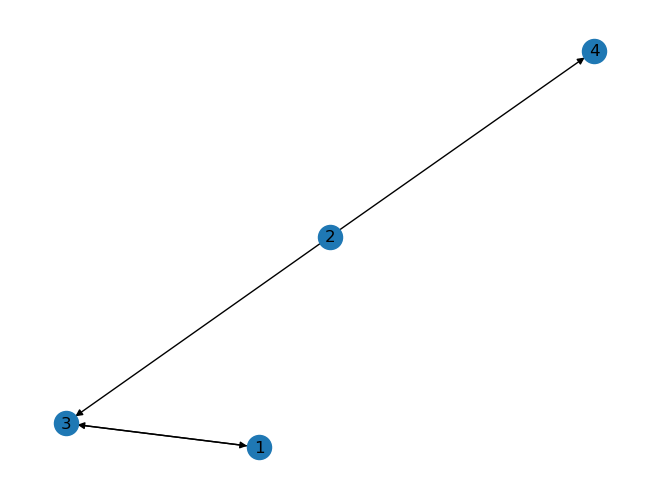

In [32]:
# d) Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.
H = DG.subgraph([1, 2, 3, 4])
nx.draw(H, with_labels=True)


# punto 4

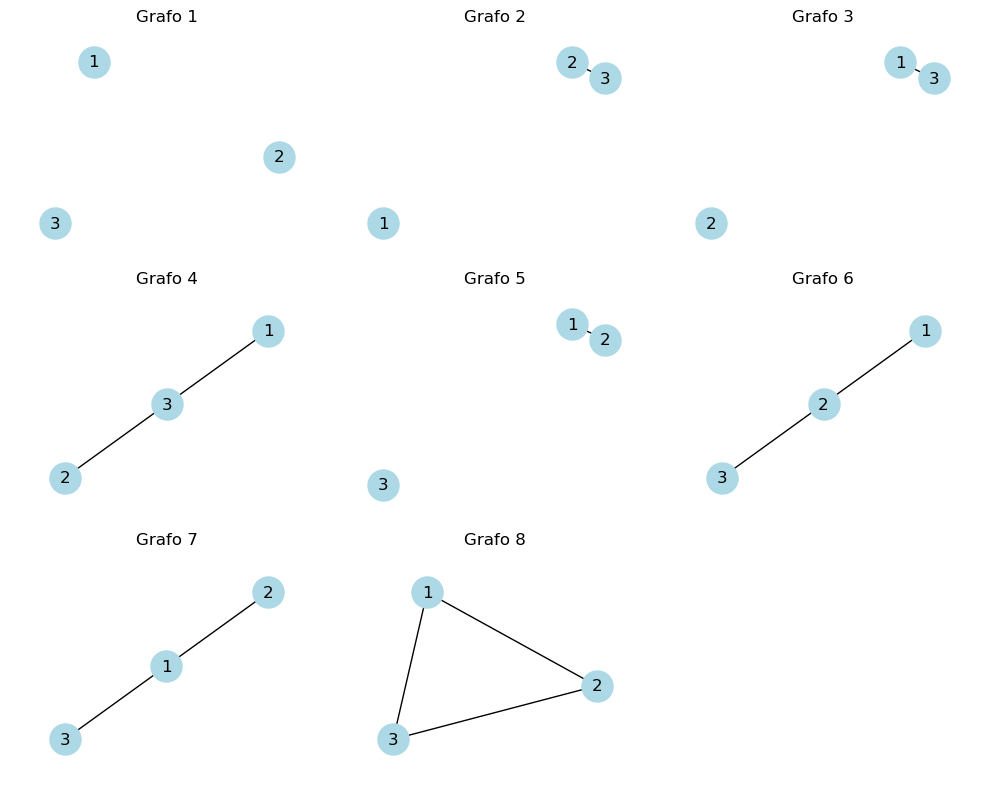

In [33]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Crear todas las combinaciones posibles de enlaces entre tres nodos
nodes = [1, 2, 3]
possible_edges = list(itertools.combinations(nodes, 2))

# Crear y dibujar cada grafo posible
plt.figure(figsize=(10, 8))
for i, edges in enumerate(itertools.product([0, 1], repeat=len(possible_edges))):
    G = nx.Graph()
    for j, edge in enumerate(possible_edges):
        if edges[j] == 1:
            G.add_edge(*edge)
    for node in nodes:
        if node not in G.nodes():
            G.add_node(node)
    
    # Ajustar la posición inicial de los nodos para centrarlos más
    pos = nx.spring_layout(G, seed=42)

    plt.subplot(3, 3, i + 1)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12)
    plt.title(f"Grafo {i + 1}")
    
    # Ajustar los márgenes
    plt.margins(0.2)

plt.tight_layout()
plt.show()


# 

In [34]:
import itertools
import networkx as nx

# Crear todas las combinaciones posibles de enlaces entre tres nodos
nodes = [1, 2, 3]
possible_edges = list(itertools.combinations(nodes, 2))

# Crear una lista para almacenar los grafos
graph_list = []

# Crear y guardar cada grafo posible en la lista
for edges in itertools.product([0, 1], repeat=len(possible_edges)):
    G = nx.Graph()
    for j, edge in enumerate(possible_edges):
        if edges[j] == 1:
            G.add_edge(*edge)
    for node in nodes:
        if node not in G.nodes():
            G.add_node(node)
    graph_list.append(G)

# Encontrar los grafos isomorfos
isomorphic_graphs = []
for i, graph1 in enumerate(graph_list):
    for j, graph2 in enumerate(graph_list[i+1:], start=i+1):
        if nx.is_isomorphic(graph1, graph2):
            isomorphic_graphs.append((i+1, j+1))

print("Pares de grafos isomorfos:")
for pair in isomorphic_graphs:
    print(f"Grafo {pair[0]} y Grafo {pair[1]} son isomorfos.")


Pares de grafos isomorfos:
Grafo 2 y Grafo 3 son isomorfos.
Grafo 2 y Grafo 5 son isomorfos.
Grafo 3 y Grafo 5 son isomorfos.
Grafo 4 y Grafo 6 son isomorfos.
Grafo 4 y Grafo 7 son isomorfos.
Grafo 6 y Grafo 7 son isomorfos.


# 5. Visualizar todos los grafos (no dirigidos) conectados con 4 vértices.

# 6. Escribir una rutina que reconstruya la matriz de adyacencia a partir de la matriz de aristas y una lista de vértices.
1. Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios independientes e idénticamente distribuidos con probabilidad de éxito 0.1.
2.  Probar la rutina con la red simulada.
3.  Visualizar la red simulada por medio de un grafo y una socio-matriz.


[(0, 8), (0, 9), (0, 18), (0, 21), (1, 2), (1, 4), (1, 14), (2, 10), (4, 6), (4, 7), (4, 9), (4, 12), (4, 19), (5, 10), (5, 12), (6, 9), (7, 11), (7, 19), (8, 12), (8, 16), (11, 12), (11, 19), (12, 20), (12, 22), (15, 18), (15, 24), (16, 19), (16, 23), (18, 23), (18, 24), (19, 21), (19, 24)]


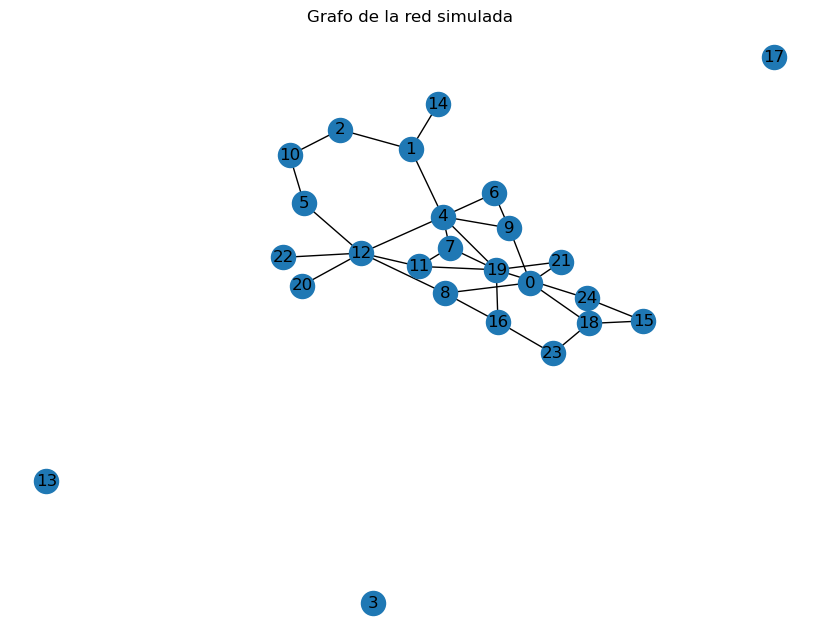

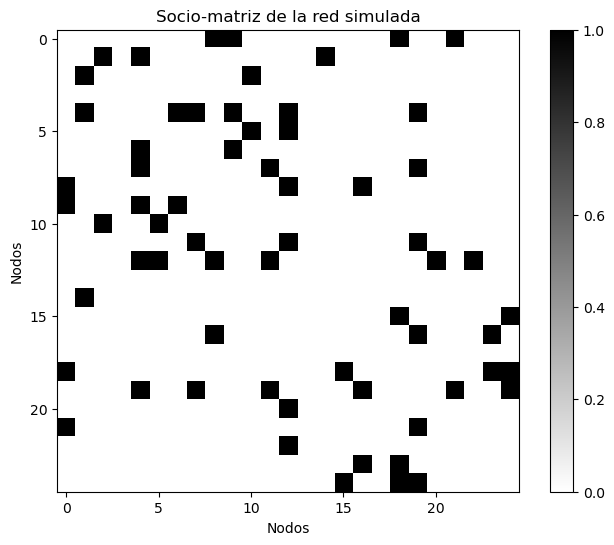

In [35]:
import numpy as np
import networkx as nx

def reconstruct_adjacency_matrix(edge_matrix, vertices):
    adjacency_matrix = np.zeros((len(vertices), len(vertices)), dtype=int)
    vertex_index = {vertex: index for index, vertex in enumerate(vertices)}
    
    for edge in edge_matrix:
        i = vertex_index[edge[0]]
        j = vertex_index[edge[1]]
        adjacency_matrix[i, j] = 1
        adjacency_matrix[j, i] = 1  # Grafo no dirigido
    
    return adjacency_matrix

# Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios
# independientes e idénticamente distribuidos con probabilidad de éxito 0.1
n = 25
p = 0.1
vertices = list(range(n))
edge_matrix = [(i, j) for i in range(n) for j in range(i+1, n) if np.random.random() < p]
print(edge_matrix)
# Probar la rutina con la red simulada
adjacency_matrix = reconstruct_adjacency_matrix(edge_matrix, vertices)

# Visualizar la red simulada por medio de un grafo
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edge_matrix)

# Visualizar el grafo
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True)
plt.title('Grafo de la red simulada')
plt.show()

# Visualizar la socio-matriz
plt.figure(figsize=(8, 6))
plt.imshow(adjacency_matrix, cmap='binary', origin='upper')
plt.title('Socio-matriz de la red simulada')
plt.xlabel('Nodos')
plt.ylabel('Nodos')
plt.colorbar()
plt.show()


# 7. Escribir una rutina que reconstruya la matriz de aristas y la lista de vértices a partir de la matriz de adyacencia.
1. Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios independientes e idénticamente distribuidos con probabilidad de éxito 0.1.
2. Probar la rutina con la red simulada.
3. Visualizar la red simulada por medio de un grafo y una socio-matriz.


[(0, 19), (0, 21), (1, 8), (1, 15), (1, 24), (2, 12), (2, 19), (2, 23), (3, 8), (3, 18), (4, 24), (5, 6), (5, 14), (5, 24), (6, 16), (6, 19), (7, 9), (7, 20), (9, 20), (12, 22), (13, 14), (14, 16)]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


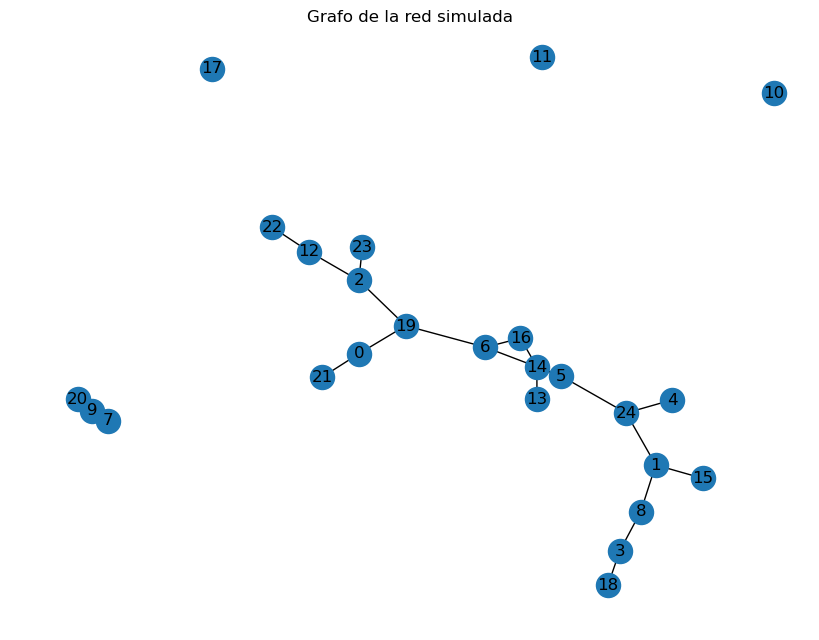

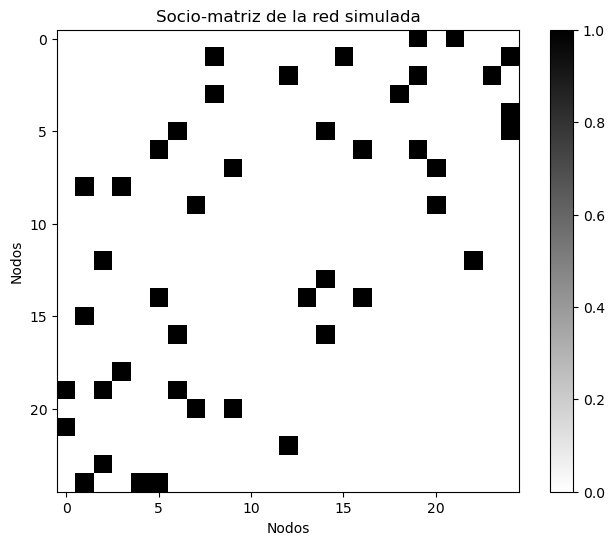

In [36]:
# generamos el grafo
from utilidades import definir_grafo_aleatorio , reconstruir_matriz_aristas_nodos
G = definir_grafo_aleatorio(25, 0.1)
# optenemos su matriz de adyacencia
A = nx.adjacency_matrix(G)
A = A.todense()
# optenemos la matriz de aristas y nodos
aristas,nodo = reconstruir_matriz_aristas_nodos(A)
print(aristas)
print(nodo)
# visualizamos el grafo
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True)
plt.title('Grafo de la red simulada')
plt.show()

# Visualizar la socio-matriz
plt.figure(figsize=(8, 6))
plt.imshow(A, cmap='binary', origin='upper')
plt.title('Socio-matriz de la red simulada')
plt.xlabel('Nodos')
plt.ylabel('Nodos')
plt.colorbar()
plt.show()


# 8.Escribir una rutina que simule redes tanto dirigidas como no dirigidas a partir de enlaces aleatorios independientes e idénticamente distribuidos con una probabilidad de éxito dada. Esta rutina debe tener como argumentos el orden de la red, la probabilidad de interacción (por defecto 0.5), el tipo de red (por defecto como no dirigida) y la semilla (por defecto 123), y además, tener como retorno una versión vectorizada de la matriz de adyacencia y una visualización. Probar esta rutina generando cuatro casos diferentes.